In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
import time
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import networkx as nx
import matplotlib.pyplot as plt

import src
from src.reload import deep_reload

In [3]:
with open('Data/US/Processed/assets.json', 'r') as file:

    assets = json.load(file)

In [5]:
'''
Gathering unique plants
'''

installed = {p['id']: p for p in assets if p['combinable']}
optional = [p for p in assets if not p['combinable']]

len(installed), len(optional)

(18930, 3123)

In [6]:
'''
Creating communities for installed assets
'''

deep_reload(src)

t0 = time.time()

fields = src.inputs.aggregate.default_fields

communities_installed = src.inputs.aggregate.communities(installed, fields = fields)

print(time.time() - t0)

58.0993766784668


In [7]:
'''
Creating groups for installed assets
'''

deep_reload(src)

t0 = time.time()

functions = {
    'oris_code': 'all',
    'egrid_id': 'all',
    'type': 'first',
    'fuel': 'first',
    '_class': 'first',
    'profile': 'first',
    'region': 'first',
    'jurisdiction': 'first',
    'nerc': 'first',
    'utility': 'all',
    'x': 'mean',
    'y': 'mean',
    'installed_capacity': 'sum',
    'capacity_factor': 'mean',
    'dispatchable': 'first',
    'combinable': 'first',
    'renewable': 'first',
    'extensible': 'first',
    'capex_capacity': 'sum',
    'capex_cost': 'sum',
    'operating_cost': 'mean',
    'heat_rate': 'mean',
    'nox': 'mean',
    'so2': 'mean',
    'co2': 'mean',
    'ch4': 'mean',
    'n2o': 'mean',
    'pm': 'mean',
}

combined_installed = src.inputs.aggregate.combine(
    installed, communities_installed, functions = functions,
)

print(time.time() - t0)

0.12894129753112793


In [8]:
'''
Combining and writing
'''
deep_reload(src)

new_assets = (
    combined_installed + optional
)

src.utilities.write_json(
    new_assets, filename = 'Data/US/Processed/combined_assets.json'
)

In [9]:
len(new_assets)

6354

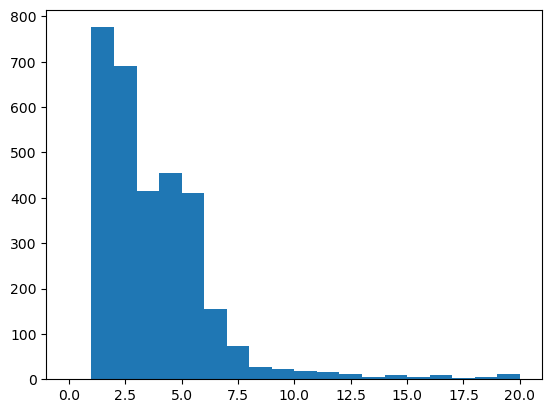

In [10]:
_ = plt.hist([len(c) for c in communities_installed], bins = np.arange(0, 21, 1))